In [ ]:
# prompt: Read the file - cleaned_data.xlsx

import pandas as pd

# Assuming 'cleaned_data.xlsx' is in the current working directory.
# If not, provide the full path to the file.
try:
  df = pd.read_excel('cleaned_final.xlsx')
  print("File 'cleaned_final.xlsx' read successfully.")
except FileNotFoundError:
  print("Error: 'cleaned_final.xlsx' not found. Please check the file path.")
except Exception as e:
  print(f"An error occurred: {e}")

# Now you can work with the DataFrame 'df'
# Example: Print the first 5 rows
# print(df.head())


File 'cleaned_final.xlsx' read successfully.


In [ ]:
import pandas as pd

# Load the dataset (update the file path to your dataset's location in Colab)
file_path = 'cleaned_final.xlsx'
data = pd.ExcelFile(file_path)

# Load the first sheet of the Excel file
df = data.parse('Sheet 1')

# Step 1: Understanding the dataset - Missing values summary
# Count of missing values
missing_values_summary = df.isnull().sum().sort_values(ascending=False)

# Percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Combine both into a single DataFrame for better understanding
missing_data_overview = pd.DataFrame({
    'Missing Count': missing_values_summary,
    'Missing Percentage': missing_percentage
}).sort_values(by='Missing Percentage', ascending=False)

# Display missing data overview
print("Missing Data Overview:")
print(missing_data_overview)


Missing Data Overview:
                             Missing Count  Missing Percentage
EV On-Site Renewable Source          78907           99.485595
EV Level1 EVSE Num                   78617           99.119965
Federal Agency Name                  78290           98.707685
Federal Agency ID                    78290           98.707685
Federal Agency Code                  78290           98.707685
Access Detail Code                   74822           94.335246
Expected Date                        73700           92.920633
Cards Accepted                       71518           90.169577
Restricted Access                    66811           84.235012
EV DC Fast Count                     66799           84.219883
EV Pricing                           63782           80.416063
Facility Type                        59921           75.548131
Owner Type Code                      58318           73.527076
EV Level2 EVSE Num                   11389           14.359201
EV Network Web                  

In [ ]:
# Step 2: Handling Missing Values

# Threshold to drop columns with more than 50% missing values
threshold = 50.0
columns_to_drop = missing_data_overview[
    missing_data_overview['Missing Percentage'] > threshold
].index.tolist()

# Drop columns with too many missing values
df_cleaned = df.drop(columns=columns_to_drop)
print(f"Columns dropped due to >{threshold}% missing data: {columns_to_drop}")

# Fill missing values for numerical columns with the mean
numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    if df_cleaned[col].isnull().sum() > 0:
        df_cleaned[col].fillna(df_cleaned[col].mean(), inplace=True)

# Fill missing values for categorical columns with the mode
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if df_cleaned[col].isnull().sum() > 0:
        df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)

# Verify missing values have been handled
missing_values_after_cleaning = df_cleaned.isnull().sum().sort_values(ascending=False)
print("\nMissing values after cleaning:")
print(missing_values_after_cleaning)


Columns dropped due to >50.0% missing data: ['EV On-Site Renewable Source', 'EV Level1 EVSE Num', 'Federal Agency Name', 'Federal Agency ID', 'Federal Agency Code', 'Access Detail Code', 'Expected Date', 'Cards Accepted', 'Restricted Access', 'EV DC Fast Count', 'EV Pricing', 'Facility Type', 'Owner Type Code']


<ipython-input-9-2bf8e88109d4>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(df_cleaned[col].mean(), inplace=True)
<ipython-input-9-2bf8e88109d4>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True


Missing values after cleaning:
Open Date                441
Date Last Confirmed      156
Fuel Type Code             0
Station Name               0
Access Code                0
Country                    0
EV Connector Types         0
Updated At                 0
ID                         0
Longitude                  0
Latitude                   0
Geocode Status             0
EV Network Web             0
EV Network                 0
EV Level2 EVSE Num         0
Access Days Time           0
Status Code                0
ZIP                        0
State                      0
City                       0
Street Address             0
EV Workplace Charging      0
dtype: int64


In [ ]:
missing_values_after_cleaning.shape

(22,)

In [ ]:
# Step 3: Descriptive Statistics

# Numerical columns - summary statistics
numerical_summary = df_cleaned.describe()

# Categorical columns - unique value counts
categorical_summary = df_cleaned.select_dtypes(include=['object']).nunique()

# Display descriptive statistics for numerical data
print("\nDescriptive Statistics for Numerical Columns:")
print(numerical_summary)

# Display count of unique values for categorical columns
print("\nCount of Unique Values in Categorical Columns:")
print(categorical_summary)



Descriptive Statistics for Numerical Columns:
       EV Level2 EVSE Num      Latitude     Longitude  \
count        79315.000000  79315.000000  79315.000000   
mean             2.551291     37.870088    -96.199288   
min              1.000000     18.009854   -162.286348   
25%              2.000000     34.043346   -117.881102   
50%              2.000000     38.596430    -91.068251   
75%              2.551291     41.591639    -78.656218   
max            338.000000     64.852466    -65.756678   
std              3.357435      5.041741     19.380892   

                 Date Last Confirmed             ID  \
count                          79159   79315.000000   
mean   2024-09-07 19:18:28.346492416  220069.654038   
min              2019-12-12 00:00:00    1517.000000   
25%              2024-10-11 00:00:00  165452.500000   
50%              2024-12-02 00:00:00  205580.000000   
75%              2024-12-02 00:00:00  308834.500000   
max              2024-12-02 00:00:00  372237.000000   

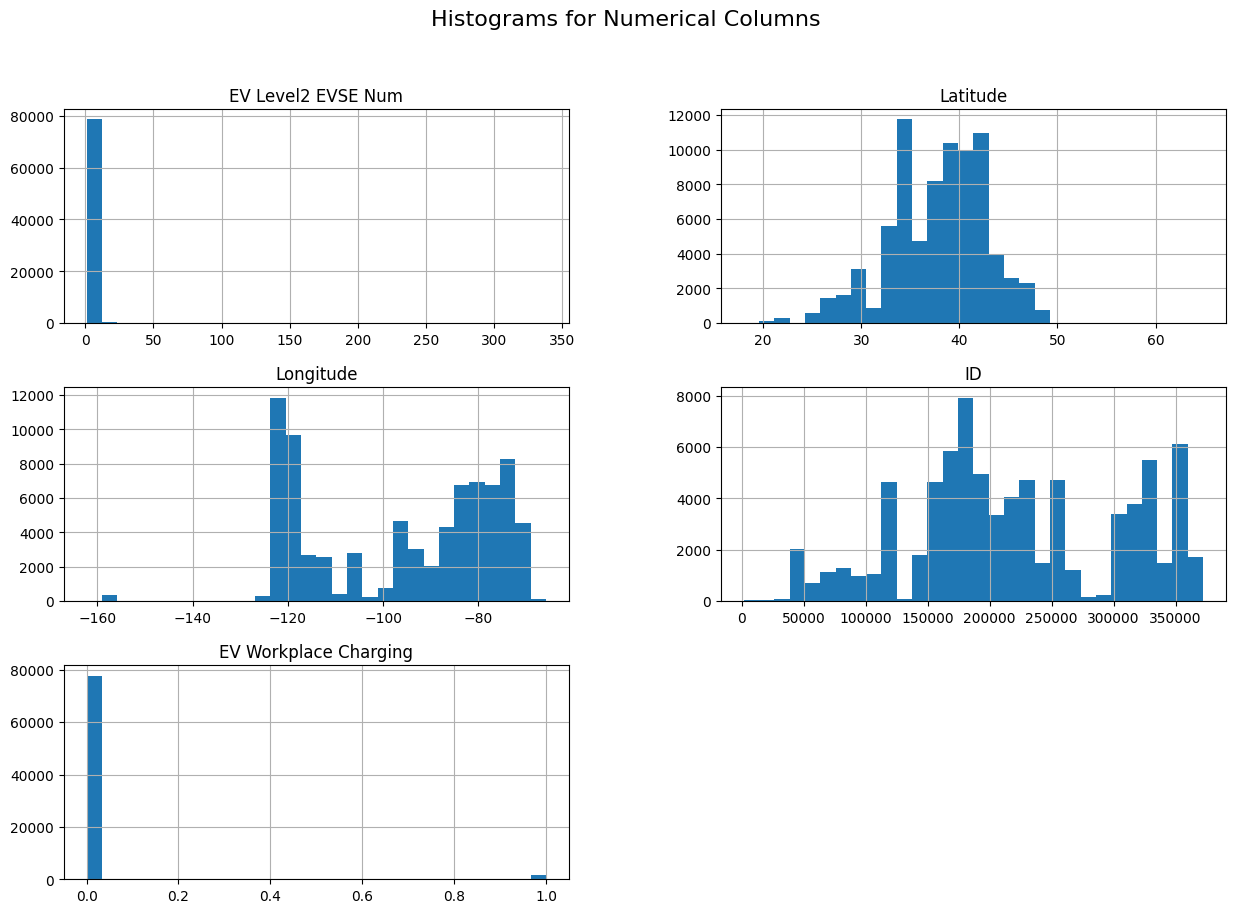

In [ ]:
import matplotlib.pyplot as plt

# Plot histograms for all numerical columns
df_cleaned.select_dtypes(include=['float64', 'int64']).hist(figsize=(15, 10), bins=30)
plt.suptitle("Histograms for Numerical Columns", fontsize=16)
plt.show()


In [ ]:
# Select only numeric columns for summary statistics
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
numerical_summary = df_cleaned[numeric_columns].describe()

# Display descriptive statistics for numerical data
print("\nDescriptive Statistics for Numerical Columns:")
print(numerical_summary)



Descriptive Statistics for Numerical Columns:
       EV Level2 EVSE Num      Latitude     Longitude             ID  \
count        79315.000000  79315.000000  79315.000000   79315.000000   
mean             2.551291     37.870088    -96.199288  220069.654038   
std              3.357435      5.041741     19.380892   85900.785636   
min              1.000000     18.009854   -162.286348    1517.000000   
25%              2.000000     34.043346   -117.881102  165452.500000   
50%              2.000000     38.596430    -91.068251  205580.000000   
75%              2.551291     41.591639    -78.656218  308834.500000   
max            338.000000     64.852466    -65.756678  372237.000000   

       EV Workplace Charging  
count           79315.000000  
mean                0.019268  
std                 0.137455  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000  


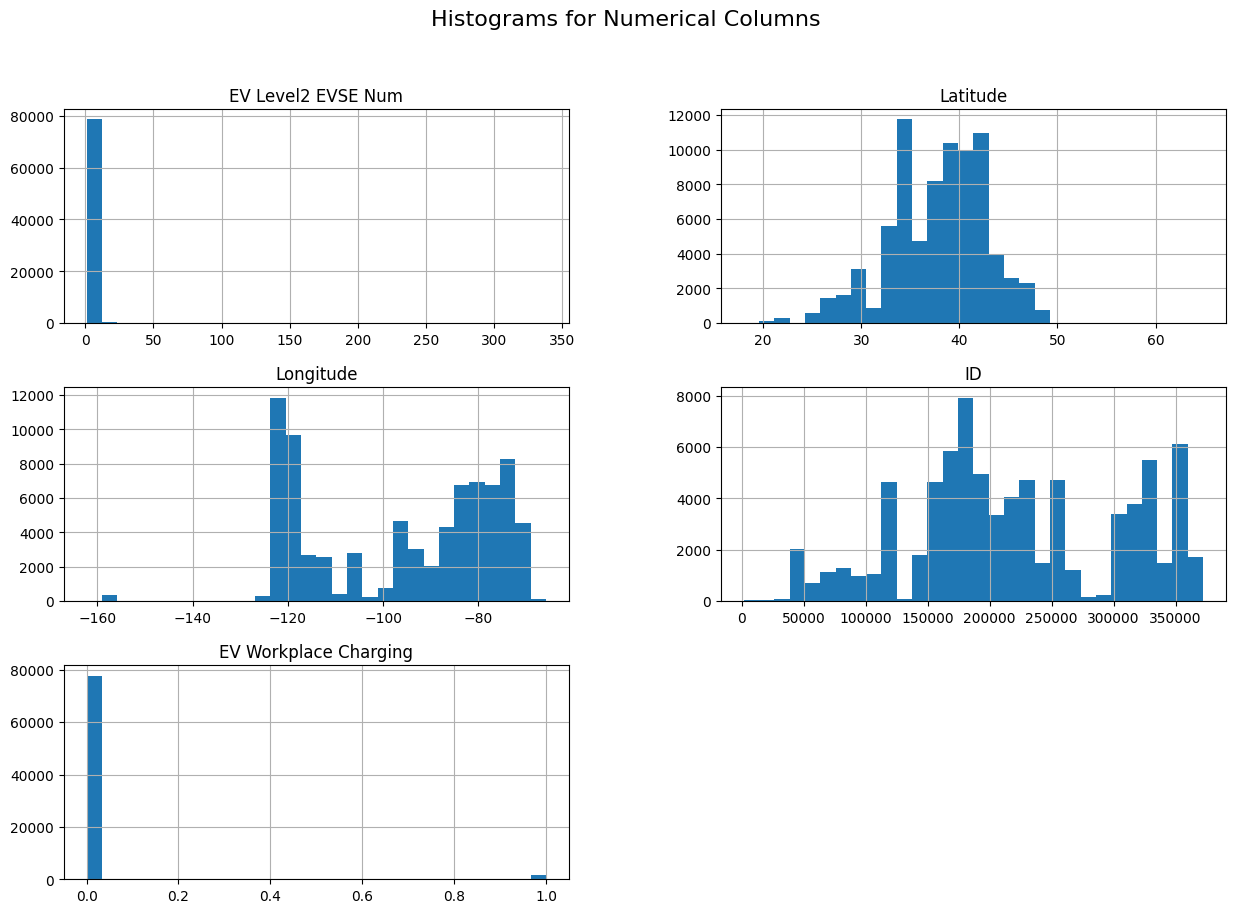

In [ ]:
# Plot histograms for all numerical columns
df_cleaned[numeric_columns].hist(figsize=(15, 10), bins=30)
plt.suptitle("Histograms for Numerical Columns", fontsize=16)
plt.show()


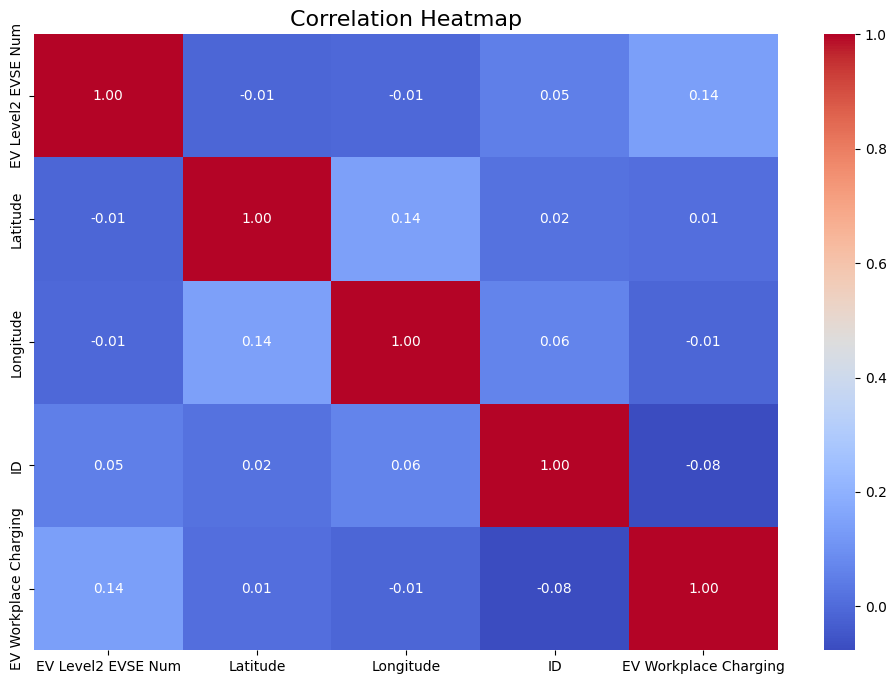

In [ ]:
# Compute the correlation matrix only for numeric columns
correlation_matrix = df_cleaned[numeric_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


Step 6: Geospatial Analysis


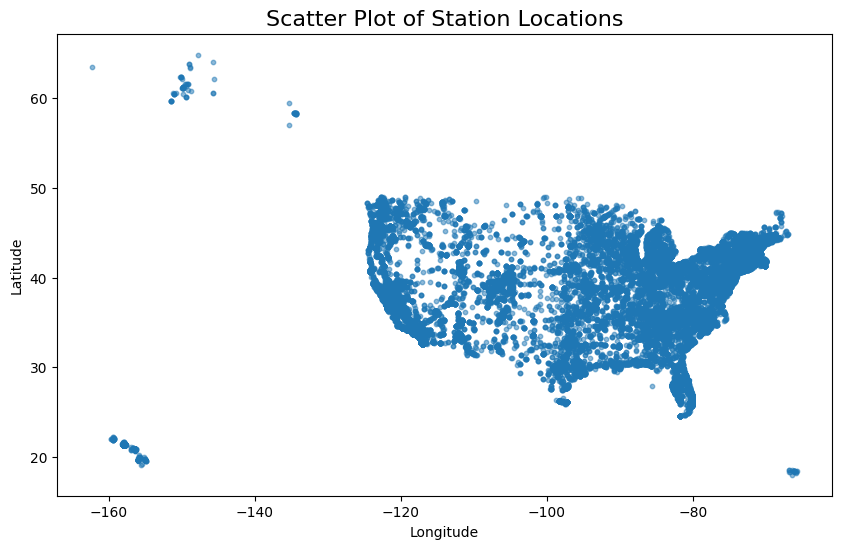

In [ ]:
# Scatter plot of locations based on Latitude and Longitude
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['Longitude'], df_cleaned['Latitude'], alpha=0.5, s=10)
plt.title("Scatter Plot of Station Locations", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


Step 7: Outlier Detection


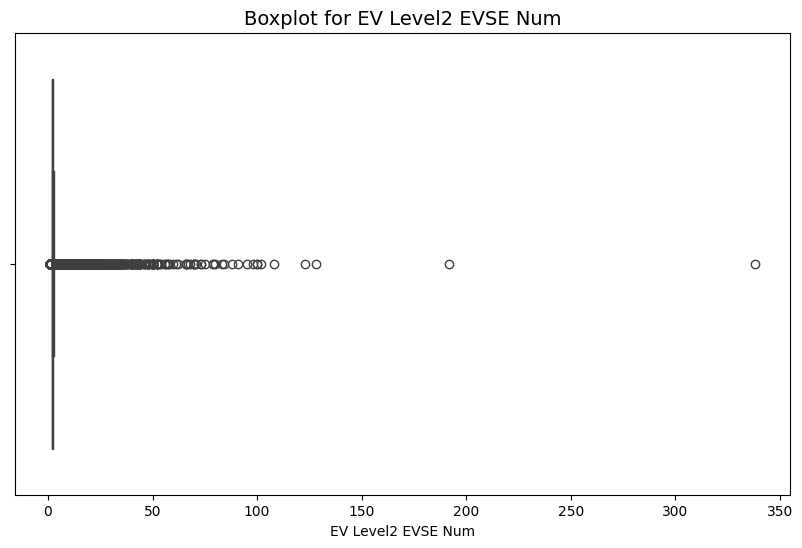

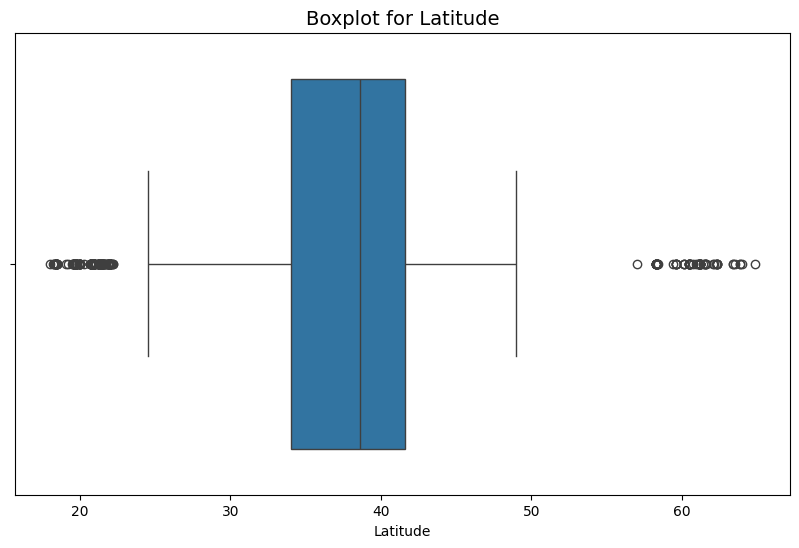

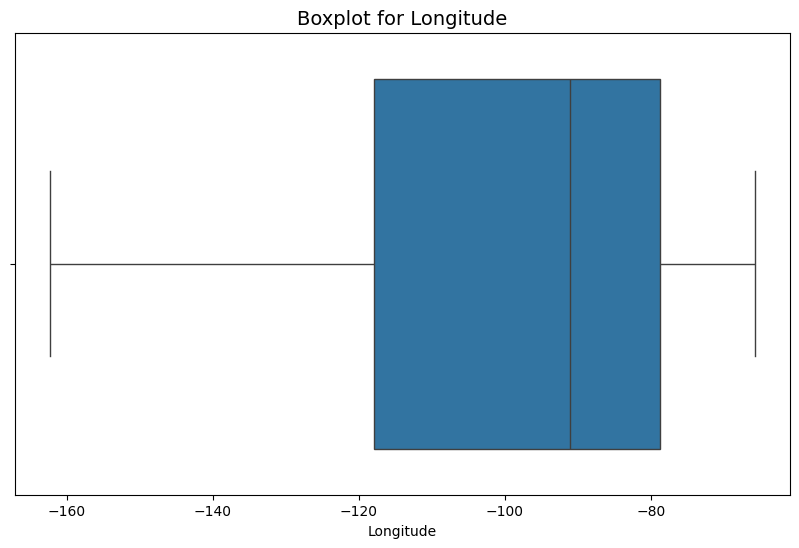

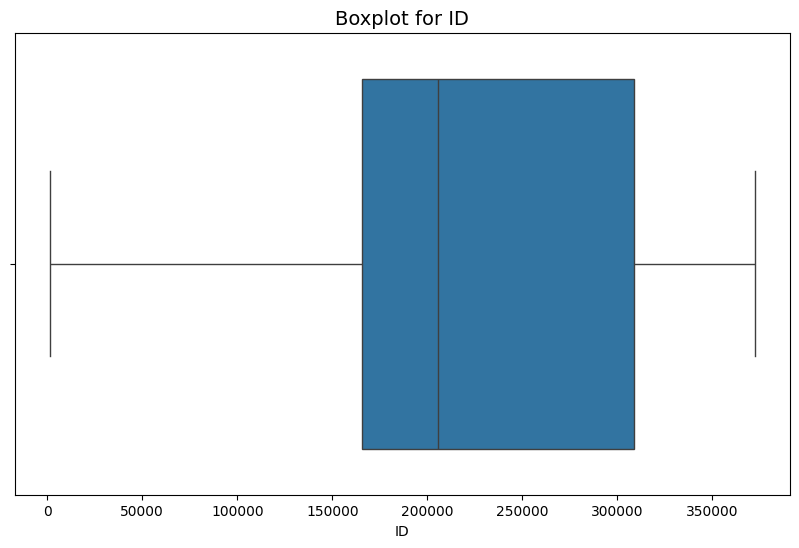

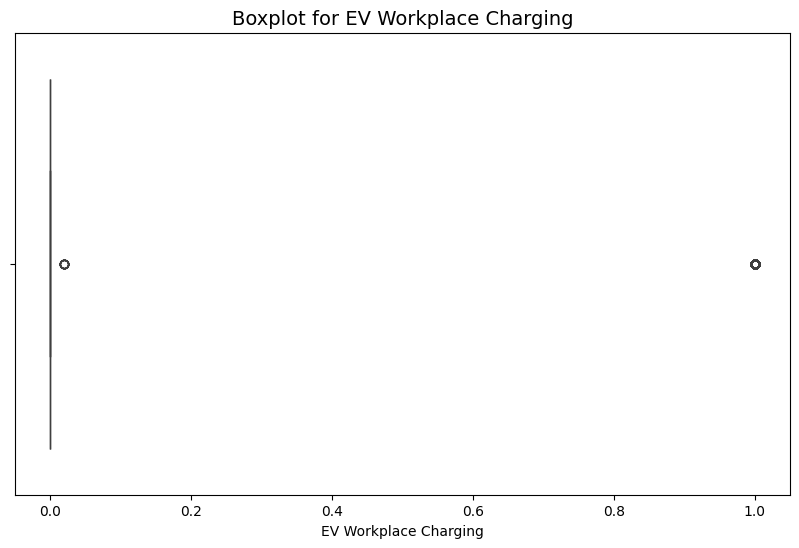

In [ ]:
# Boxplot to detect outliers in numerical columns
for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_cleaned[col])
    plt.title(f"Boxplot for {col}", fontsize=14)
    plt.show()


In [ ]:
# Print all column names in the cleaned dataset
print("Columns in the cleaned dataset:")
print(df_cleaned.columns)


Columns in the cleaned dataset:
Index(['Fuel Type Code', 'Station Name', 'Street Address', 'City', 'State',
       'ZIP', 'Status Code', 'Access Days Time', 'EV Level2 EVSE Num',
       'EV Network', 'EV Network Web', 'Geocode Status', 'Latitude',
       'Longitude', 'Date Last Confirmed', 'ID', 'Updated At', 'Open Date',
       'EV Connector Types', 'Country', 'Access Code',
       'EV Workplace Charging'],
      dtype='object')


In [ ]:
# Step: Removing Outliers using IQR
def remove_outliers_iqr(data, columns):
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out rows with outliers
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

# Select numerical columns for outlier detection
numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Remove outliers
df_no_outliers = remove_outliers_iqr(df_cleaned, numerical_columns)

# Display results
print(f"Shape before outlier removal: {df_cleaned.shape}")
print(f"Shape after outlier removal: {df_no_outliers.shape}")


Shape before outlier removal: (79315, 22)
Shape after outlier removal: (55347, 22)


Duplicacy

In [ ]:
# Step: Removing Duplicates
# Check for duplicate rows
print(f"Number of duplicate rows before removal: {df_cleaned.duplicated().sum()}")

# Remove duplicate rows
df_no_duplicates = df_cleaned.drop_duplicates()

# Display results
print(f"Shape before duplicate removal: {df_cleaned.shape}")
print(f"Shape after duplicate removal: {df_no_duplicates.shape}")


Number of duplicate rows before removal: 0
Shape before duplicate removal: (79315, 22)
Shape after duplicate removal: (79315, 22)


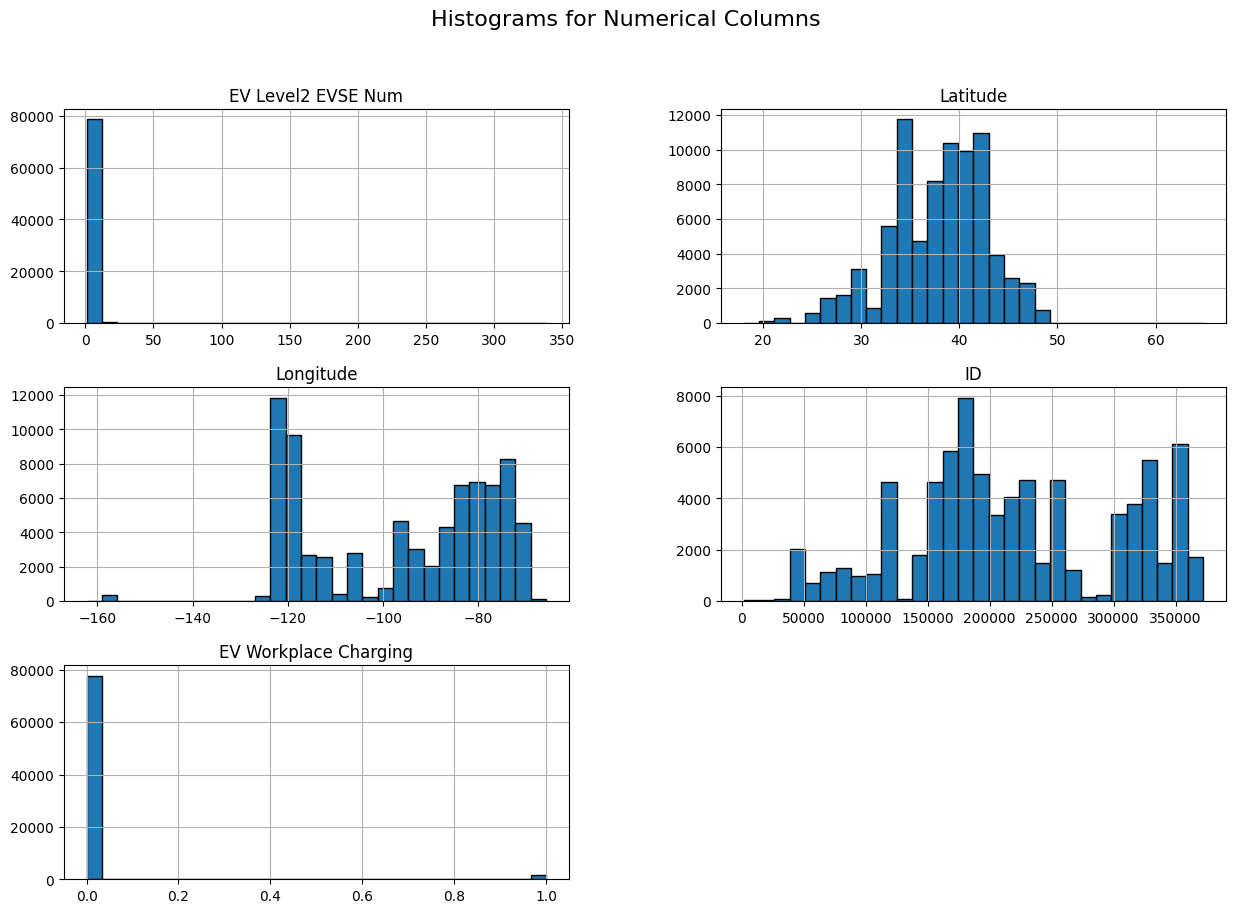

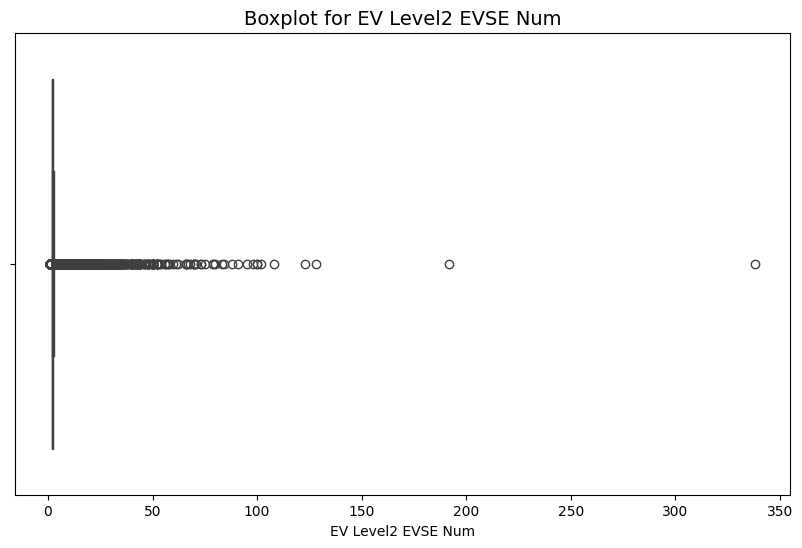

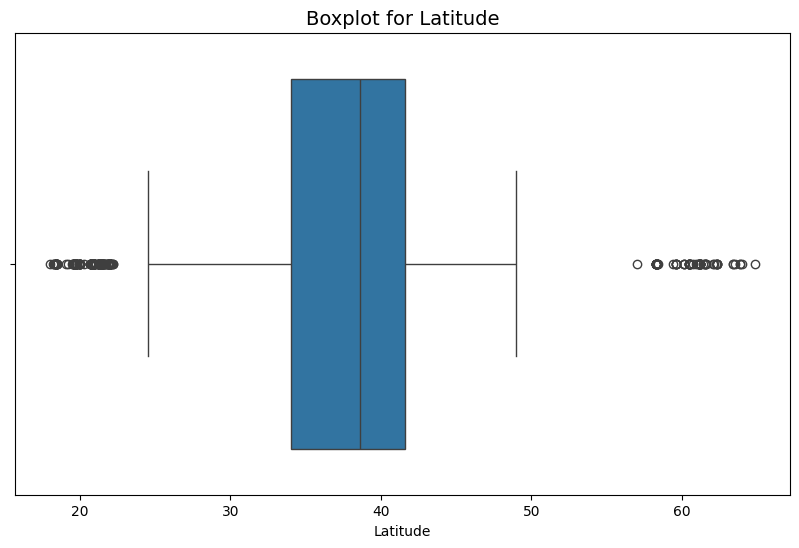

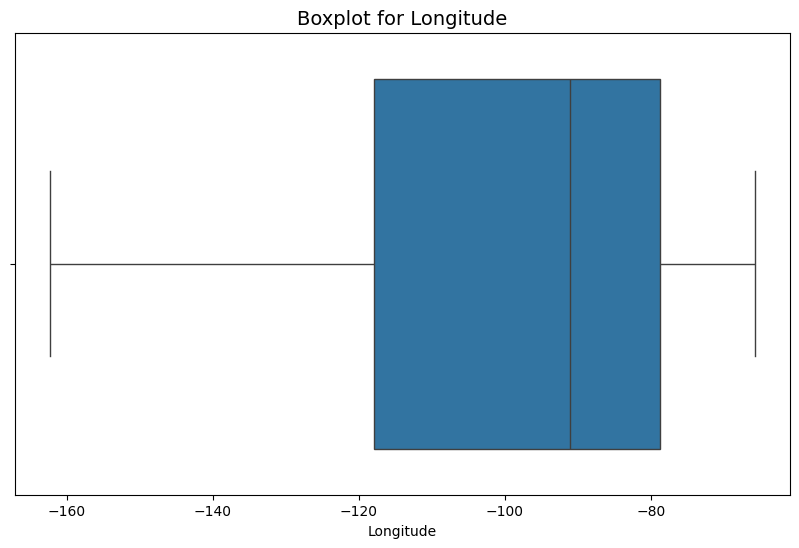

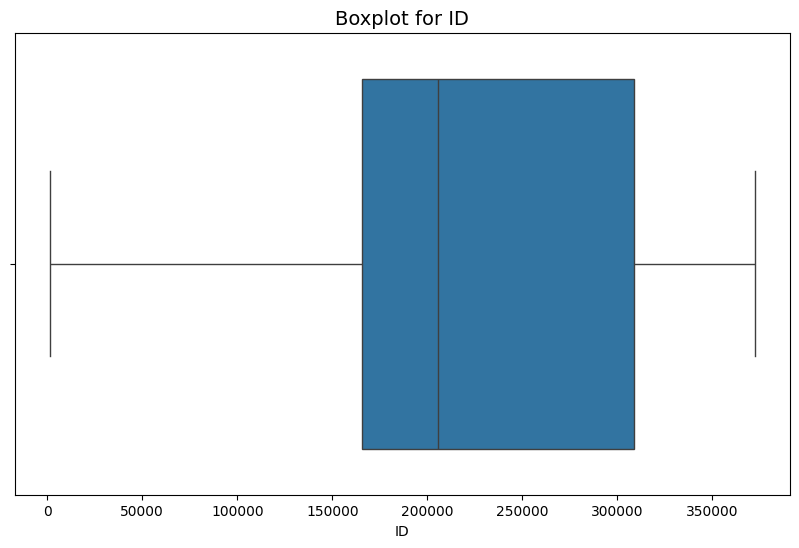

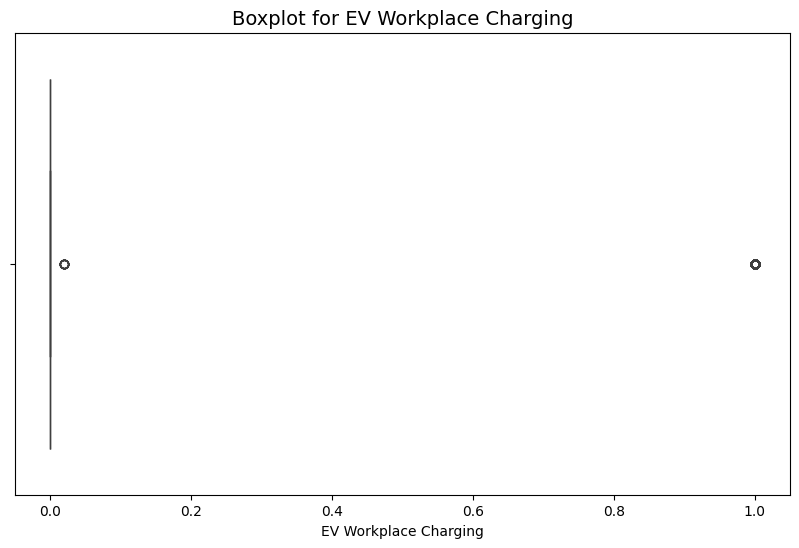

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for all numerical columns
numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

df_cleaned[numerical_columns].hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle("Histograms for Numerical Columns", fontsize=16)
plt.show()

# Plot boxplots for each numerical column to check for skewness and outliers
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_cleaned[col])
    plt.title(f"Boxplot for {col}", fontsize=14)
    plt.show()


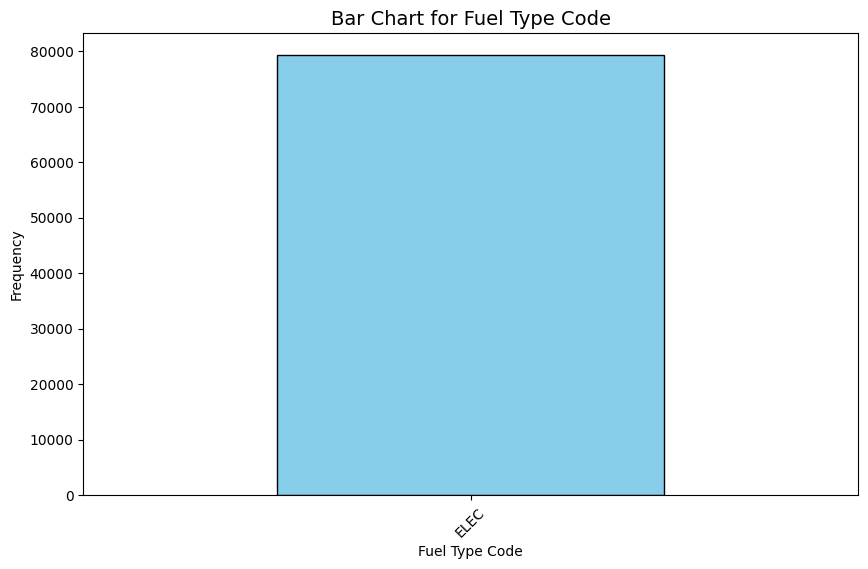

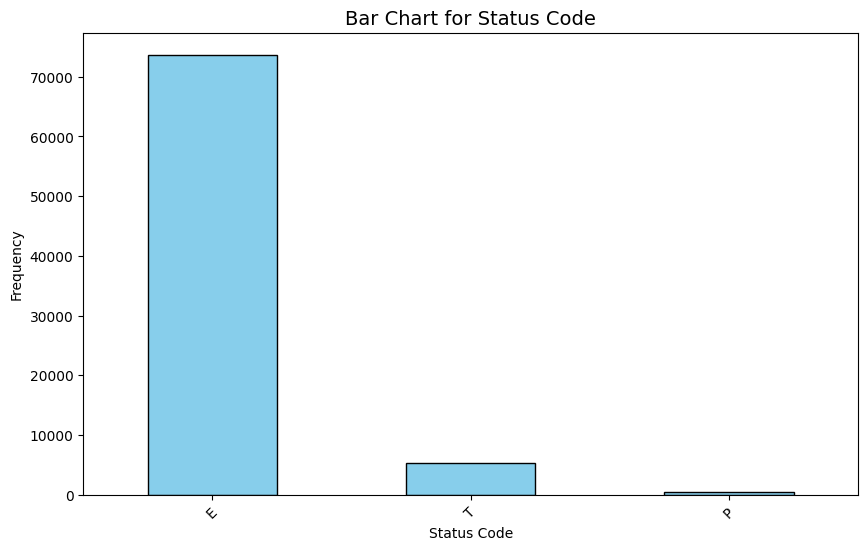

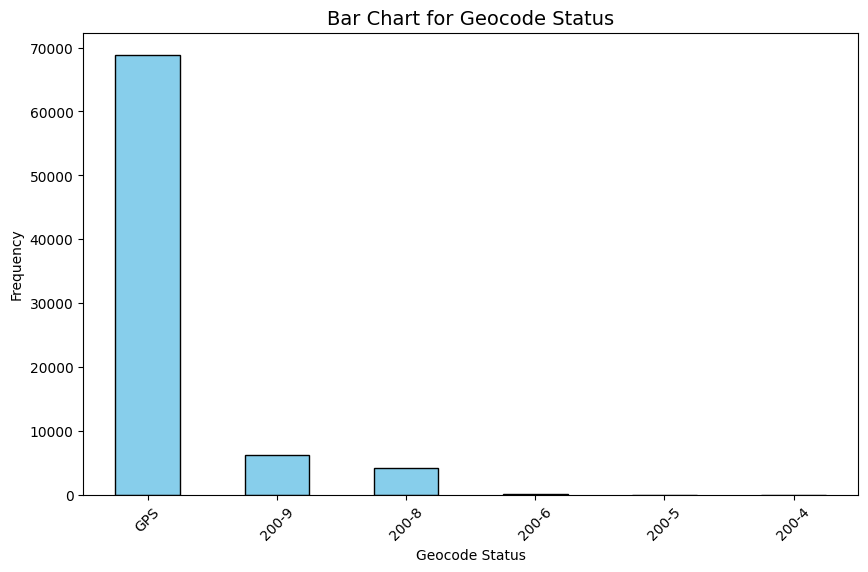

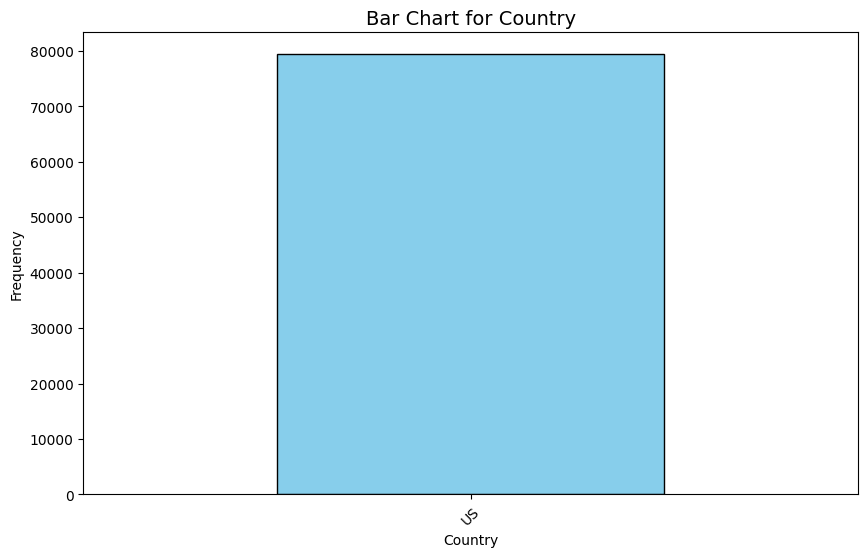

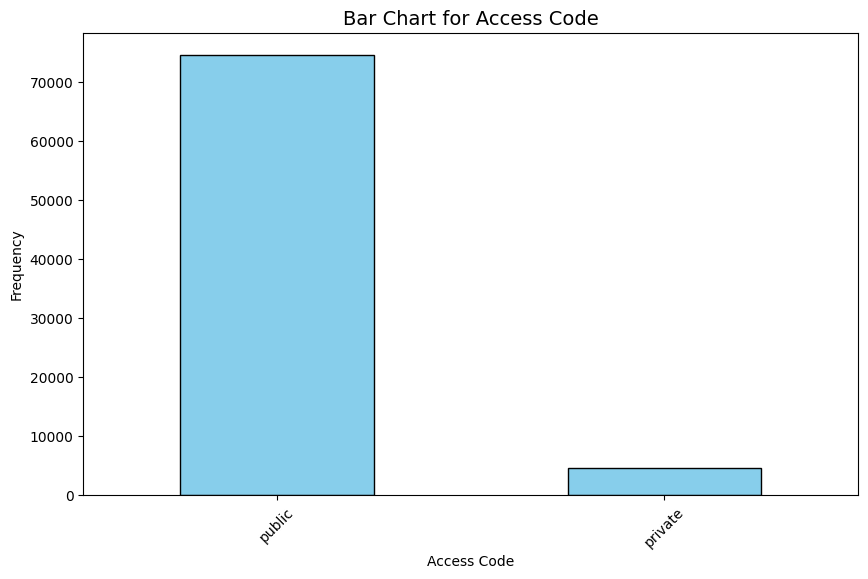

In [ ]:
# Select top categorical columns with unique values less than a threshold (e.g., 20 categories)
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns
filtered_categorical_columns = [col for col in categorical_columns if df_cleaned[col].nunique() < 20]

# Plot bar charts for each categorical column
for col in filtered_categorical_columns:
    plt.figure(figsize=(10, 6))
    df_cleaned[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Bar Chart for {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
# Descriptive statistics for numerical data
print("Descriptive Statistics for Numerical Data:")
print(df_cleaned[numerical_columns].describe())

# Frequency distribution for categorical columns
print("\nFrequency Distribution for Categorical Data:")
for col in filtered_categorical_columns:
    print(f"\n{col}:")
    print(df_cleaned[col].value_counts())


Descriptive Statistics for Numerical Data:
       EV Level2 EVSE Num      Latitude     Longitude             ID  \
count        79315.000000  79315.000000  79315.000000   79315.000000   
mean             2.551291     37.870088    -96.199288  220069.654038   
std              3.357435      5.041741     19.380892   85900.785636   
min              1.000000     18.009854   -162.286348    1517.000000   
25%              2.000000     34.043346   -117.881102  165452.500000   
50%              2.000000     38.596430    -91.068251  205580.000000   
75%              2.551291     41.591639    -78.656218  308834.500000   
max            338.000000     64.852466    -65.756678  372237.000000   

       EV Workplace Charging  
count           79315.000000  
mean                0.019268  
std                 0.137455  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000  

Frequency Distribution for C